In [1]:
#Date Updated:12/2/2020
#Topic: US COVID Confirmed Cases from January 22 - Nov 18

import pandas as pd
import numpy as np
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

#Read excel dataset
df = pd.read_excel('timeseries_covid19_us_confirmed.xlsx',index_col='date',parse_dates=True)

#since everything is US, it is now irrelevant in this dataframe
df = df.drop(columns=['country'])
df.head()

,total
date,
2020-01-22,1
2020-01-23,1
2020-01-24,2
2020-01-25,2
2020-01-26,5


In [2]:
df.tail()

,total
date,
2020-11-14,10903890
2020-11-15,11036935
2020-11-16,11195388
2020-11-17,11357322
2020-11-18,11527483


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 302 entries, 2020-01-22 to 2020-11-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   total   302 non-null    int64
dtypes: int64(1)
memory usage: 4.7 KB


In [4]:
df.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12',
               '2020-11-13', '2020-11-14', '2020-11-15', '2020-11-16',
               '2020-11-17', '2020-11-18'],
              dtype='datetime64[ns]', name='date', length=302, freq=None)

In [5]:
df.total.describe()

count        302.00
mean     3449043.82
std      3255033.28
min            1.00
25%       379654.50
50%      2260995.00
75%      6176917.50
max     11527483.00
Name: total, dtype: float64

## ETS Decomposition

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
result = seasonal_decompose(df['total'], model = 'multiplicative')
result

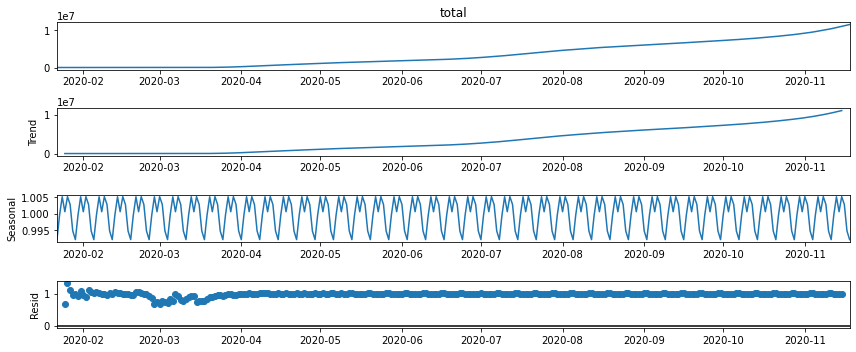

In [8]:
from pylab import rcParams
rcParams['figure.figsize']=12,5
result.plot();

Analysis: There is a trend and seasonality in this dataset.

# Forecasting with Holt-Winters Method

### Train & Test Split

In [9]:
#80/20 split 80% of 302 is 242 and 20% of 302 is 60
train_data = df.iloc[:242] # Goes up to but not including 242
test_data = df.iloc[242:]
test_data.index

DatetimeIndex(['2020-09-20', '2020-09-21', '2020-09-22', '2020-09-23',
               '2020-09-24', '2020-09-25', '2020-09-26', '2020-09-27',
               '2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01',
               '2020-10-02', '2020-10-03', '2020-10-04', '2020-10-05',
               '2020-10-06', '2020-10-07', '2020-10-08', '2020-10-09',
               '2020-10-10', '2020-10-11', '2020-10-12', '2020-10-13',
               '2020-10-14', '2020-10-15', '2020-10-16', '2020-10-17',
               '2020-10-18', '2020-10-19', '2020-10-20', '2020-10-21',
               '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25',
               '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
               '2020-10-30', '2020-10-31', '2020-11-01', '2020-11-02',
               '2020-11-03', '2020-11-04', '2020-11-05', '2020-11-06',
               '2020-11-07', '2020-11-08', '2020-11-09', '2020-11-10',
               '2020-11-11', '2020-11-12', '2020-11-13', '2020-11-14',
      

### Fitting the Model

In [11]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")

fitted_model = ExponentialSmoothing(train_data['total'],trend='mul',seasonal='mul',seasonal_periods=7).fit()

### Evaluating Model against Test Set

In [12]:
test_predictions = fitted_model.forecast(60).rename('Case Forecast') #from 9/20/20 to 11/18/20

In [13]:
test_predictions

2020-09-20   6792599.98
2020-09-21   6823433.77
2020-09-22   6859234.19
2020-09-23   6897742.27
2020-09-24   6942690.15
2020-09-25   6994527.90
2020-09-26   7044113.55
2020-09-27   7079736.42
2020-09-28   7111873.61
2020-09-29   7149187.39
2020-09-30   7189323.28
2020-10-01   7236171.19
2020-10-02   7290200.22
2020-10-03   7341881.95
2020-10-04   7379010.67
2020-10-05   7412506.36
2020-10-06   7451397.46
2020-10-07   7493229.98
2020-10-08   7542058.24
2020-10-09   7598371.19
2020-10-10   7652237.61
2020-10-11   7690935.83
2020-10-12   7725847.44
2020-10-13   7766382.55
2020-10-14   7809983.41
2020-10-15   7860875.74
2020-10-16   7919569.14
2020-10-17   7975712.60
2020-10-18   8016046.67
2020-10-19   8052434.06
2020-10-20   8094682.67
2020-10-21   8140126.62
2020-10-22   8193170.27
2020-10-23   8254344.76
2020-10-24   8312861.51
2020-10-25   8354900.57
2020-10-26   8392826.14
2020-10-27   8436860.68
2020-10-28   8484225.63
2020-10-29   8539511.54
2020-10-30   8603271.99
2020-10-31   866

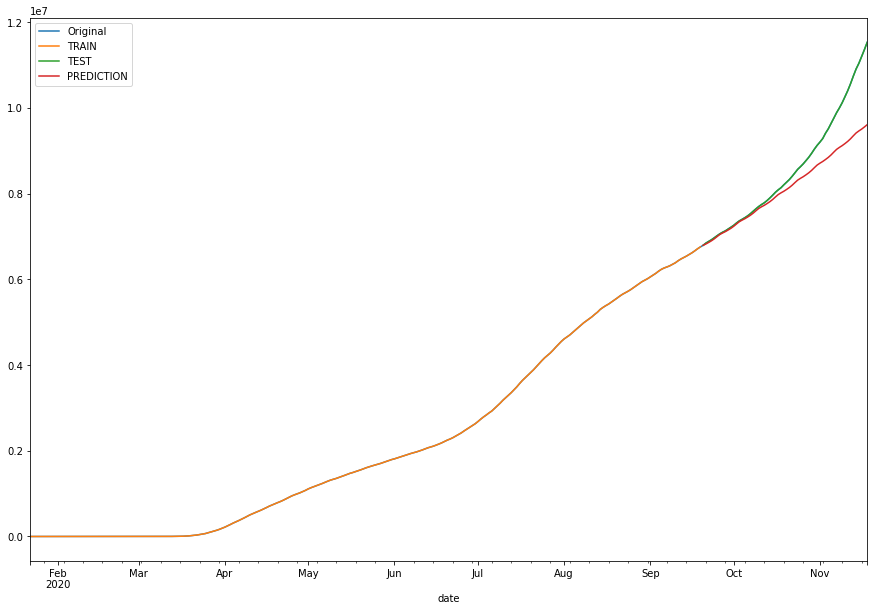

In [14]:
train_data['total'].plot(legend=True,label='TRAIN')
test_data['total'].plot(legend=True,label='TEST',figsize=(15,10))
test_predictions.plot(legend=True,label='PREDICTION');

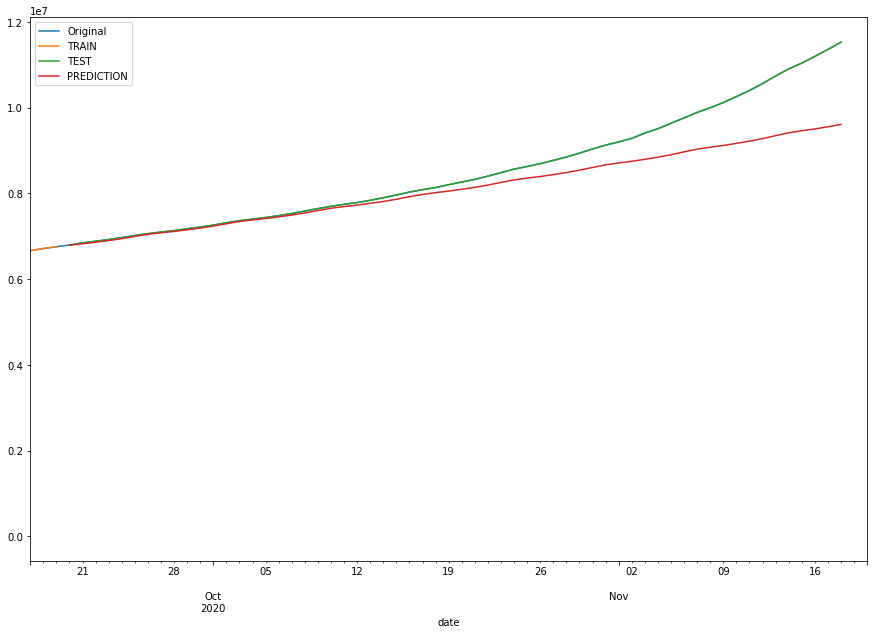

In [15]:
train_data['total'].plot(legend=True,label='TRAIN')
#original test values
test_data['total'].plot(legend=True,label='TEST',figsize=(15,10))
#Zoom to focus on the comparison of testing and prediction
test_predictions.plot(legend=True,label='PREDICTION',xlim=['9/17/2020','11/20/2020']);

### Evaluation Metrics

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [21]:
mean_absolute_error(test_data,test_predictions)

416912.65773325687

In [22]:
mean_squared_error(test_data,test_predictions)

451241030828.88965

In [23]:
np.sqrt(mean_squared_error(test_data,test_predictions))

671744.7661343478

In [24]:
test_data.describe() #we want to compare MSE with Avergae of Test Data, or RMSE with STD of overall True Data

,total
count,60.00
mean,8538448.17
std,1332108.82
min,6792454.00
25%,7426597.75
50%,8232494.00
75%,9431263.25
max,11527483.00


# Forecasting into the Future

In [25]:
final_model = ExponentialSmoothing(df['total'],trend='mul',seasonal='mul',seasonal_periods=7).fit()

In [26]:
forecast_predictions = final_model.forecast(43)#forecast to December 31,2020
forecast_predictions

2020-11-19   11714725.90
2020-11-20   11905480.82
2020-11-21   12083389.11
2020-11-22   12230237.42
2020-11-23   12399905.68
2020-11-24   12583441.87
2020-11-25   12775773.95
2020-11-26   12979665.49
2020-11-27   13191017.86
2020-11-28   13388136.44
2020-11-29   13550841.22
2020-11-30   13738830.03
2020-12-01   13942184.19
2020-12-02   14155284.02
2020-12-03   14381191.48
2020-12-04   14615365.38
2020-12-05   14833768.54
2020-12-06   15014041.96
2020-12-07   15222329.53
2020-12-08   15447641.60
2020-12-09   15683751.64
2020-12-10   15934052.27
2020-12-11   16193511.94
2020-12-12   16435497.96
2020-12-13   16635237.06
2020-12-14   16866015.22
2020-12-15   17115656.17
2020-12-16   17377261.04
2020-12-17   17654588.78
2020-12-18   17942064.54
2020-12-19   18210179.87
2020-12-20   18431486.51
2020-12-21   18687183.78
2020-12-22   18963780.60
2020-12-23   19253633.19
2020-12-24   19560906.40
2020-12-25   19879423.38
2020-12-26   20176489.43
2020-12-27   20421692.45
2020-12-28   20704999.55


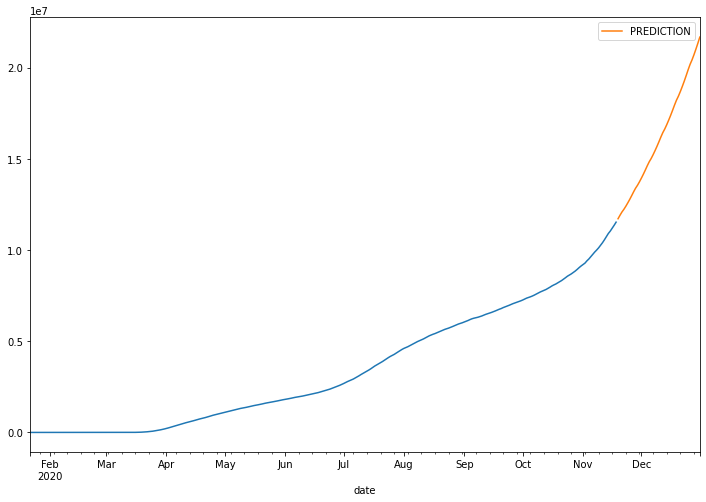

In [27]:
df['total'].plot(figsize=(12,8))
forecast_predictions.plot(legend=True,label='PREDICTION');

In [28]:
#Winter season 2020 (Predicted from 11/19 to 12/31) percentage increase.
100 * (forecast_predictions.loc['2020-12-31'] - forecast_predictions.loc['2020-11-19']) / forecast_predictions.loc['2020-11-19']

85.00702185365063

Analysis: By the end of the year, there will be an increase of about 21,673,065.50 total confirmed cases in the United States. This is an 85% increase from November 19 to December 31. 

# EWMA

In [29]:
#Create a simple moving average (SMA) - 1 week
df['7-day-SMA'] = df['total'].rolling (window = 7).mean() #Window is in relation days
df.head(10)

,total,7-day-SMA
date,,
2020-01-22,1,nan
2020-01-23,1,nan
2020-01-24,2,nan
2020-01-25,2,nan
2020-01-26,5,nan
2020-01-27,5,nan
2020-01-28,5,3.00
2020-01-29,6,3.71
2020-01-30,6,4.43


In [30]:
#Create a simple moving average (SMA) - 2 weeks
df['14-day-SMA'] = df['total'].rolling (window = 14).mean() 

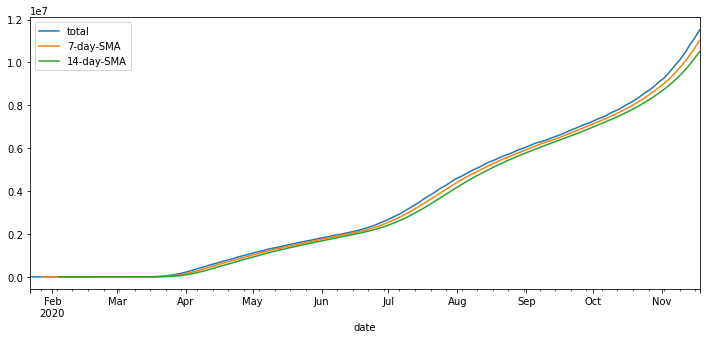

In [31]:
df.plot(figsize=(12,5));

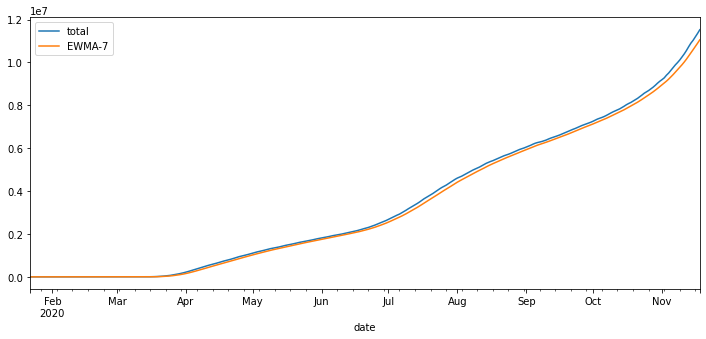

In [32]:
df['EWMA-7'] = df['total'].ewm (span = 7).mean()
df[['total', 'EWMA-7']].plot(figsize=(12,5));

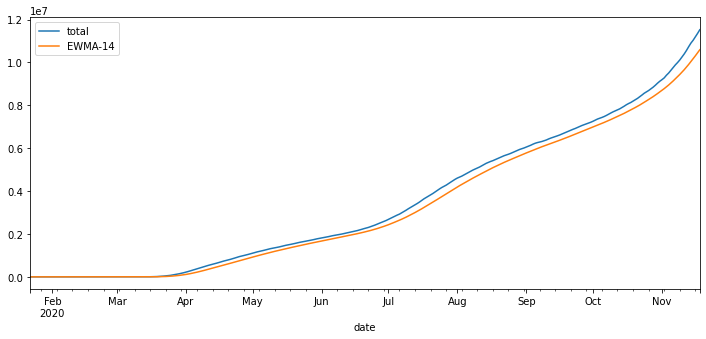

In [33]:
#Exponential Weighted Moving Average - EWMA 2 weeks
df['EWMA-14'] = df['total'].ewm (span = 14).mean()
df[['total', 'EWMA-14']].plot(figsize=(12,5));

Analysis: We can conclude that using a weekly (7 days) period and a two-week (14 days) period show very similar positive trend as the original total number of confirmed cases. 

# ACF & PACF

In [34]:
# Import the statsmodel
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [35]:
df = pd.DataFrame({'total':[1,1,2,2,5,5,5,6,6,8,8,8,11,11,11,12,12,12,12,12,13,13,14,14,14,14,14,14,14,14,16,16,16,16,16,16,
                            17,17,25,32,55,74,107,184,237,403,519,594,782,1147,1586,2219,2978,3212,4679,6512,9169,13663,20030,
                            26025,34855,46080,56685,68754,86613,105293,124900,143779,165835,192177,218035,248447,280417,313417,
                            341629,371802,403212,435375,469989,503439,532761,559695,585518,614061,644213,675624,708296,736237,
                            761932,790348,816389,845698,878911,912662,944211,971066,994253,1018907,1046722,1076203,1110443,
                            1138215,1162681,1186063,1210541,1235639,1263365,1290121,1315078,1333956,1353366,1376091,1397050,
                            1424212,1449467,1473497,1491804,1513789,1534835,1557967,1583760,1607071,1628134,1648146,1666542,
                            1685931,1704448,1727316,1751532,1775411,1794444,1811364,1832750,1852783,1874133,1899531,1920893,
                            1938579,1956121,1974436,1995392,2018432,2043341,2068537,2087608,2107106,2130753,2157124,2185059,
                            2216056,2247987,2274003,2304675,2340836,2375209,2415570,2460898,2502411,2542727,2582721,2628753,
                            2680294,2735926,2787598,2833232,2882830,2927021,2987639,3047438,3109997,3177856,3237911,3297011,
                            3355793,3423156,3490765,3567937,3639586,3702091,3762878,3824330,3888437,3960276,4028867,4102027,
                            4167452,4222488,4278460,4344232,4415991,4483552,4550214,4607983,4654133,4698705,4755862,4810377,
                            4869668,4927811,4982203,5028443,5077133,5124014,5180717,5232435,5297168,5343926,5385099,5421610,
                            5466634,5513998,5558067,5606317,5649966,5684419,5720909,5760722,5806212,5851281,5897820,5943118,
                            5977868,6013011,6054607,6095534,6139311,6189453,6232569,6263967,6287484,6314339,6348188,6384163,
                            6431466,6472367,6506533,6540379,6579728,6618161,6663061,6711680,6754647,6792454,6843972,6883437,
                            6921997,6967687,7015737,7059974,7097217,7129408,7172182,7213326,7258592,7312775,7361385,7397455,
                            7436312,7479029,7529600,7587826,7643776,7697676,7743468,7784396,7837182,7896552,7960813,8029175,
                            8085940,8135180,8201980,8263008,8325891,8400991,8481812,8564592,8626352,8692595,8768402,8846899,
                            8936997,9035265,9123994,9199595,9281802,9405633,9508154,9634074,9759029,9887116,9996838,10117470,
                            10256089,10399325,10560111,10737335,10903890,11036935,11195388,11357322,11527483]})
#biased array
arr = acovf(df['total'])
arr

array([ 1.05601581e+13,  1.04311329e+13,  1.03041667e+13,  1.01791011e+13,
        1.00558966e+13,  9.93390599e+12,  9.81407419e+12,  9.69673329e+12,
        9.58148888e+12,  9.46792707e+12,  9.35598378e+12,  9.24521981e+12,
        9.13537486e+12,  9.02697941e+12,  8.91997751e+12,  8.81442936e+12,
        8.70974772e+12,  8.60656220e+12,  8.50378645e+12,  8.40126321e+12,
        8.29936393e+12,  8.19836409e+12,  8.09806770e+12,  7.99819666e+12,
        7.89871253e+12,  7.79938309e+12,  7.70010251e+12,  7.60145517e+12,
        7.50340473e+12,  7.40581328e+12,  7.30837902e+12,  7.21108057e+12,
        7.11409732e+12,  7.01696991e+12,  6.91990753e+12,  6.82323086e+12,
        6.72684376e+12,  6.63063838e+12,  6.53446161e+12,  6.43800632e+12,
        6.34141184e+12,  6.24490350e+12,  6.14854164e+12,  6.05239584e+12,
        5.95627835e+12,  5.85999604e+12,  5.76345440e+12,  5.66658134e+12,
        5.56971658e+12,  5.47301321e+12,  5.37623746e+12,  5.27928989e+12,
        5.18223111e+12,  

In [36]:
#Unbiased array
ubarr = acovf(df['total'],unbiased=True)
ubarr

array([ 1.05601581e+13,  1.04657878e+13,  1.03728612e+13,  1.02812326e+13,
        1.01908750e+13,  1.01011435e+13,  1.00130081e+13,  9.92682527e+12,
        9.84220967e+12,  9.75875077e+12,  9.67639418e+12,  9.59469547e+12,
        9.51339037e+12,  9.43303730e+12,  9.35358753e+12,  9.27511382e+12,
        9.19700634e+12,  9.11993608e+12,  9.04275883e+12,  8.96530562e+12,
        8.88797130e+12,  8.81105322e+12,  8.73434445e+12,  8.65754621e+12,
        8.58061577e+12,  8.50329853e+12,  8.42547448e+12,  8.34777986e+12,
        8.27017601e+12,  8.19251140e+12,  8.11445023e+12,  8.03596432e+12,
        7.95724960e+12,  7.87778777e+12,  7.79780624e+12,  7.71766187e+12,
        7.63724366e+12,  7.55642562e+12,  7.47502805e+12,  7.39269167e+12,
        7.30956632e+12,  7.22590367e+12,  7.14176760e+12,  7.05723376e+12,
        6.97207775e+12,  6.88606539e+12,  6.79907511e+12,  6.71101006e+12,
        6.62226144e+12,  6.53300392e+12,  6.44295125e+12,  6.35197429e+12,
        6.26013518e+12,  

In [37]:
#Autocorrelation for 1D
acarr = acf(df['total'])
acarr

array([1.        , 0.98778189, 0.97575876, 0.9639156 , 0.95224868,
       0.94069671, 0.92934918, 0.91823751, 0.90732438, 0.89657058,
       0.88597005, 0.8754812 , 0.86507937, 0.8548148 , 0.8446822 ,
       0.83468726, 0.82477437, 0.81500316, 0.80527075, 0.79556226,
       0.78591285, 0.77634862, 0.76685099, 0.75739365, 0.74797295,
       0.73856689, 0.72916546, 0.719824  , 0.71053905, 0.70129758,
       0.69207099, 0.68285726, 0.67367337, 0.66447584, 0.65528446,
       0.64612961, 0.63700218, 0.62789196, 0.61878445, 0.60965056,
       0.6005035 ])

In [38]:
#Partial Autocorrelation
pacarr = pacf_yw(df['total'],nlags=100,method='mle') #Maximum likelihood estimation
pacarr

array([ 1.00000000e+00,  9.87781888e-01,  1.88165403e-03,  1.38828245e-03,
        1.34307326e-03, -1.07383731e-03,  2.64652362e-03,  4.08529870e-03,
        2.72581801e-03,  1.25286999e-03,  1.08334127e-03, -5.45786397e-04,
       -1.50699889e-03,  5.87989088e-04,  4.42386853e-04,  7.46885718e-04,
       -1.46930534e-03,  9.76451749e-04, -3.17767462e-03, -3.81892768e-03,
       -2.40165404e-03, -1.34656710e-03, -2.06660292e-03, -3.15053523e-03,
       -3.35637941e-03, -4.30809420e-03, -4.75731794e-03, -2.52615855e-03,
       -2.66722704e-03, -3.19083410e-03, -4.39213691e-03, -4.54624598e-03,
       -3.90581987e-03, -5.69155028e-03, -4.94252705e-03, -3.74237083e-03,
       -4.12961398e-03, -4.57040897e-03, -5.22556364e-03, -6.49126494e-03,
       -6.01447985e-03, -5.17912863e-03, -4.98483747e-03, -4.73378389e-03,
       -5.50571788e-03, -6.33487126e-03, -6.77960931e-03, -7.12220688e-03,
       -5.85311674e-03, -5.29932991e-03, -6.23857077e-03, -6.68939453e-03,
       -6.54602058e-03, -

In [39]:
#Partial Unbiased 
ubarr2= pacf_yw(df['total'],nlags=100,method='unbiased')
ubarr2

array([ 1.00000000e+00,  9.91063555e-01,  3.19481420e-03,  2.52730145e-03,
        2.47355434e-03, -8.72347535e-04,  4.29720236e-03,  6.32912579e-03,
        4.45542978e-03,  2.40618915e-03,  2.16855511e-03, -1.34649329e-04,
       -1.50184645e-03,  1.47740598e-03,  1.27230767e-03,  1.71284704e-03,
       -1.47770032e-03,  2.03266906e-03, -3.99059012e-03, -4.95328420e-03,
       -2.90884680e-03, -1.39033513e-03, -2.45223741e-03, -4.07520798e-03,
       -4.42750931e-03, -5.88642835e-03, -6.59113846e-03, -3.28442810e-03,
       -3.52024307e-03, -4.32716074e-03, -6.18327552e-03, -6.47421395e-03,
       -5.54735824e-03, -8.30356398e-03, -7.20279641e-03, -5.39660866e-03,
       -6.02922818e-03, -6.75135766e-03, -7.83122057e-03, -9.87717751e-03,
       -9.18461317e-03, -7.91231503e-03, -7.65405638e-03, -7.29455954e-03,
       -8.58201615e-03, -9.98654031e-03, -1.07769492e-02, -1.13976223e-02,
       -9.40048995e-03, -8.55795523e-03, -1.01497703e-02, -1.09665433e-02,
       -1.08254255e-02, -

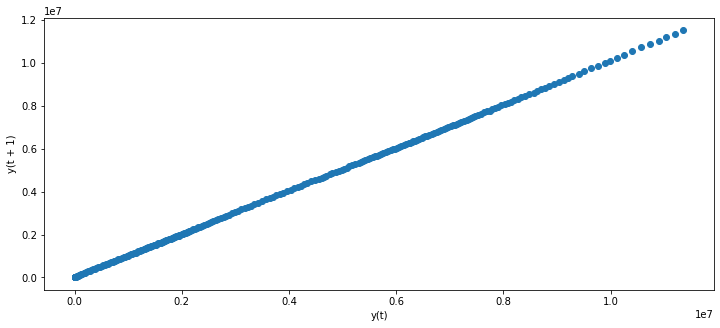

In [40]:
#Plotpoint to show correlation
from pandas.plotting import lag_plot

lag_plot(df['total']);

In [41]:
#ACF Plots
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [42]:
#ACF array
acf(df['total']) #41 lags was returned

array([1.        , 0.98778189, 0.97575876, 0.9639156 , 0.95224868,
       0.94069671, 0.92934918, 0.91823751, 0.90732438, 0.89657058,
       0.88597005, 0.8754812 , 0.86507937, 0.8548148 , 0.8446822 ,
       0.83468726, 0.82477437, 0.81500316, 0.80527075, 0.79556226,
       0.78591285, 0.77634862, 0.76685099, 0.75739365, 0.74797295,
       0.73856689, 0.72916546, 0.719824  , 0.71053905, 0.70129758,
       0.69207099, 0.68285726, 0.67367337, 0.66447584, 0.65528446,
       0.64612961, 0.63700218, 0.62789196, 0.61878445, 0.60965056,
       0.6005035 ])

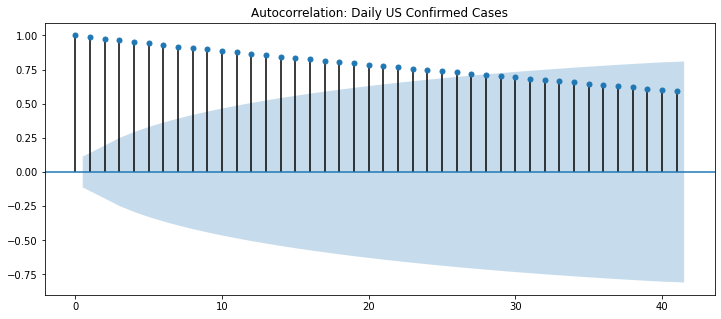

In [43]:
#Plot the autocorrelation at 41 lags
title = 'Autocorrelation: Daily US Confirmed Cases'
lags = 41
plot_acf(df,title=title,lags=lags);

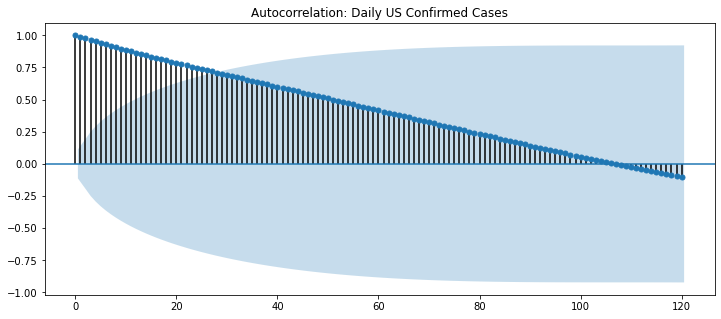

In [44]:
#How far does it go to reach negative?
title = 'Autocorrelation: Daily US Confirmed Cases'
lags = 120
plot_acf(df,title=title,lags=lags);

Analysis: The previous data of COVID cases does affect the number of future cases. According to the ACF plots. The autocorrelation of daily US Confirmed Cases is gradually decreasing. By 110 lags, the autocorrelation reaches 0 and lags after 110 becomes negative. 

## Differencing

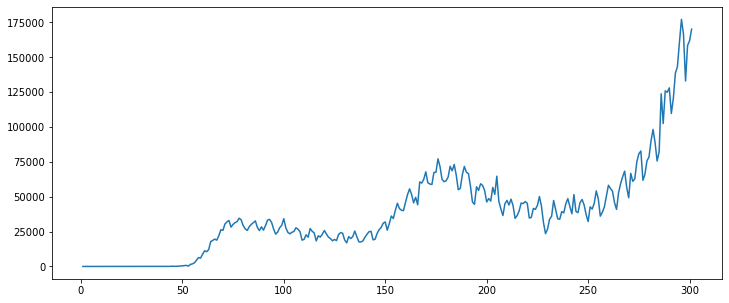

In [45]:
#apply differencing
from statsmodels.tsa.statespace.tools import diff

df['d1'] = diff(df['total'],k_diff=1)
df['d1'].plot(figsize=(12,5));

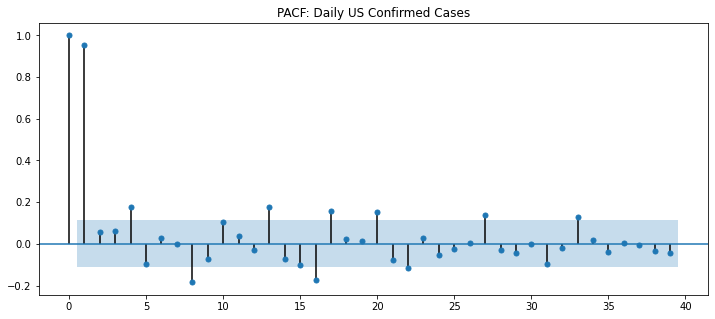

In [46]:
title='PACF: Daily US Confirmed Cases'
lags=40
plot_pacf(df['d1'].dropna(),title=title,lags=np.arange(lags));  # be sure to add .dropna() here!

## Plot Resizing

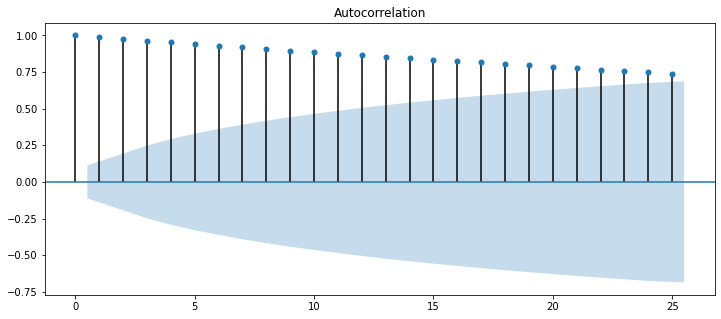

In [47]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,5))

plot_acf(df['total'],ax=ax);